# AIPI 590 - XAI | Assignment #04
### Interpretable ML2
### Yabei Zeng

#### Link to Colab: https://colab.research.google.com/github/yabeizeng1121/XAI/blob/main/Assignment4/Interpretable_ml2..ipynb

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/yabeizeng1121/XAI/blob/main/Assignment4/Interpretable_ml2.ipynb)


In [7]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "XAI" # Change to your repo name
git_path = 'https://github.com/yabeizeng1121/XAI.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt
!pip install imodels --quiet
!pip install gosdt --quiet
# Change working directory to location of notebook
notebook_dir = 'Assignment4'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

rm: cannot remove './sample_data': No such file or directory


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cloning into 'XAI'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 51 (delta 11), reused 46 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (51/51), 1.70 MiB | 5.68 MiB/s, done.
Resolving deltas: 100% (11/11), done.
/content/XAI/Assignment4/XAI/Assignment4
BoostedRuleClassifier.jpg  requirements.txt         Titanic-Dataset.csv
GreedyTreeClassfier.jpg    ScopeRuleClassifier.jpg


## Data Preparation
This notebook explores the performances and algorithms of interpretable model from `imodels` on `Titanic dataset` available from Kaggle. The dataset includes information about the passengers aboard the Titanic, which sank after colliding with an iceberg in 1912. Our analysis aims to uncover patterns and insights regarding the survival rates of passengers and identify key factors that contributed to survival or non-survival.

### Dataset Columns
- **PassengerId**: Unique identifier for each passenger.
- **Survived**: Indicates if a passenger survived or not (0 = No, 1 = Yes).
- **Pclass**: Ticket class as a proxy for socio-economic status (1 = 1st, 2 = 2nd, 3 = 3rd).
- **Name**: Full name of the passenger.
- **Sex**: Gender of the passenger (male or female).
- **Age**: Age in years; fractional if age is less than one and if the age is estimated, it is in the form of xx.5.
- **SibSp**: Number of siblings and spouses aboard.
- **Parch**: Number of parents and children aboard.
- **Ticket**: Ticket number.
- **Fare**: Passenger fare.
- **Cabin**: Cabin number.
- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).


### Data Reference
The dataset used in this analysis is the "Titanic: Machine Learning from Disaster" dataset, made available by Kaggle. It can be accessed at [Kaggle's Titanic Dataset page](https://www.kaggle.com/datasets/shuofxz/titanic-machine-learning-from-disaster/data).

In [ ]:
# import packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imodels import BoostedRulesClassifier, HSTreeClassifierCV
import matplotlib.pyplot as plt
import pydotplus
from sklearn.tree import plot_tree
from IPython.display import Image


In [ ]:
# import the dataset
data = pd.read_csv('/content/XAI/Assignment4/Titanic-Dataset.csv').dropna()
X = data.drop(['Survived','PassengerId','Name'], axis=1)
y = data['Survived']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# split the dataset
## get dummies for the categorical ones
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Boosted Rule Classifier
The `BoostedRulesClassifier` from the `imodels` package is a machine learning model that leverages boosting techniques to create an ensemble of rule-based models. This classifier is particularly useful in scenarios where interpretability is crucial, as it provides clear and understandable rules that describe its decision-making process. Each rule in the ensemble contributes to the final decision, making it easy to trace how conclusions are drawn, which is essential for applications requiring transparency, such as in healthcare or finance.

In the context of the Titanic dataset, the `BoostedRulesClassifier` helps identify patterns and rules that contribute to a passenger's likelihood of survival, based on various features such as age, sex, passenger class, etc.

In [ ]:
model_boosted = BoostedRulesClassifier()
model_boosted.fit(X_train, y_train)
print(model_boosted)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


BoostedRulesClassifier()


In [ ]:
y_pred = model_boosted.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')


Accuracy: 0.78


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but BoostedRulesClassifier was fitted without feature names
  warnings.warn(


### Model Performance Analysis

The BoostedRulesClassifier achieved an accuracy of approximately 78% on the test set. This level of accuracy indicates that the model is reasonably effective at predicting survival outcomes based on the given features of the Titanic dataset. Below is the classification report which provides further insight into the precision, recall, and F1-scores for each class, offering a more detailed view of the model's ability to handle both the positive (survived) and negative (did not survive) classes.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.80      0.87      0.83        23

    accuracy                           0.78        37
   macro avg       0.78      0.76      0.76        37
weighted avg       0.78      0.78      0.78        37



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Model Algorithm Block Diagram Visualization







/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


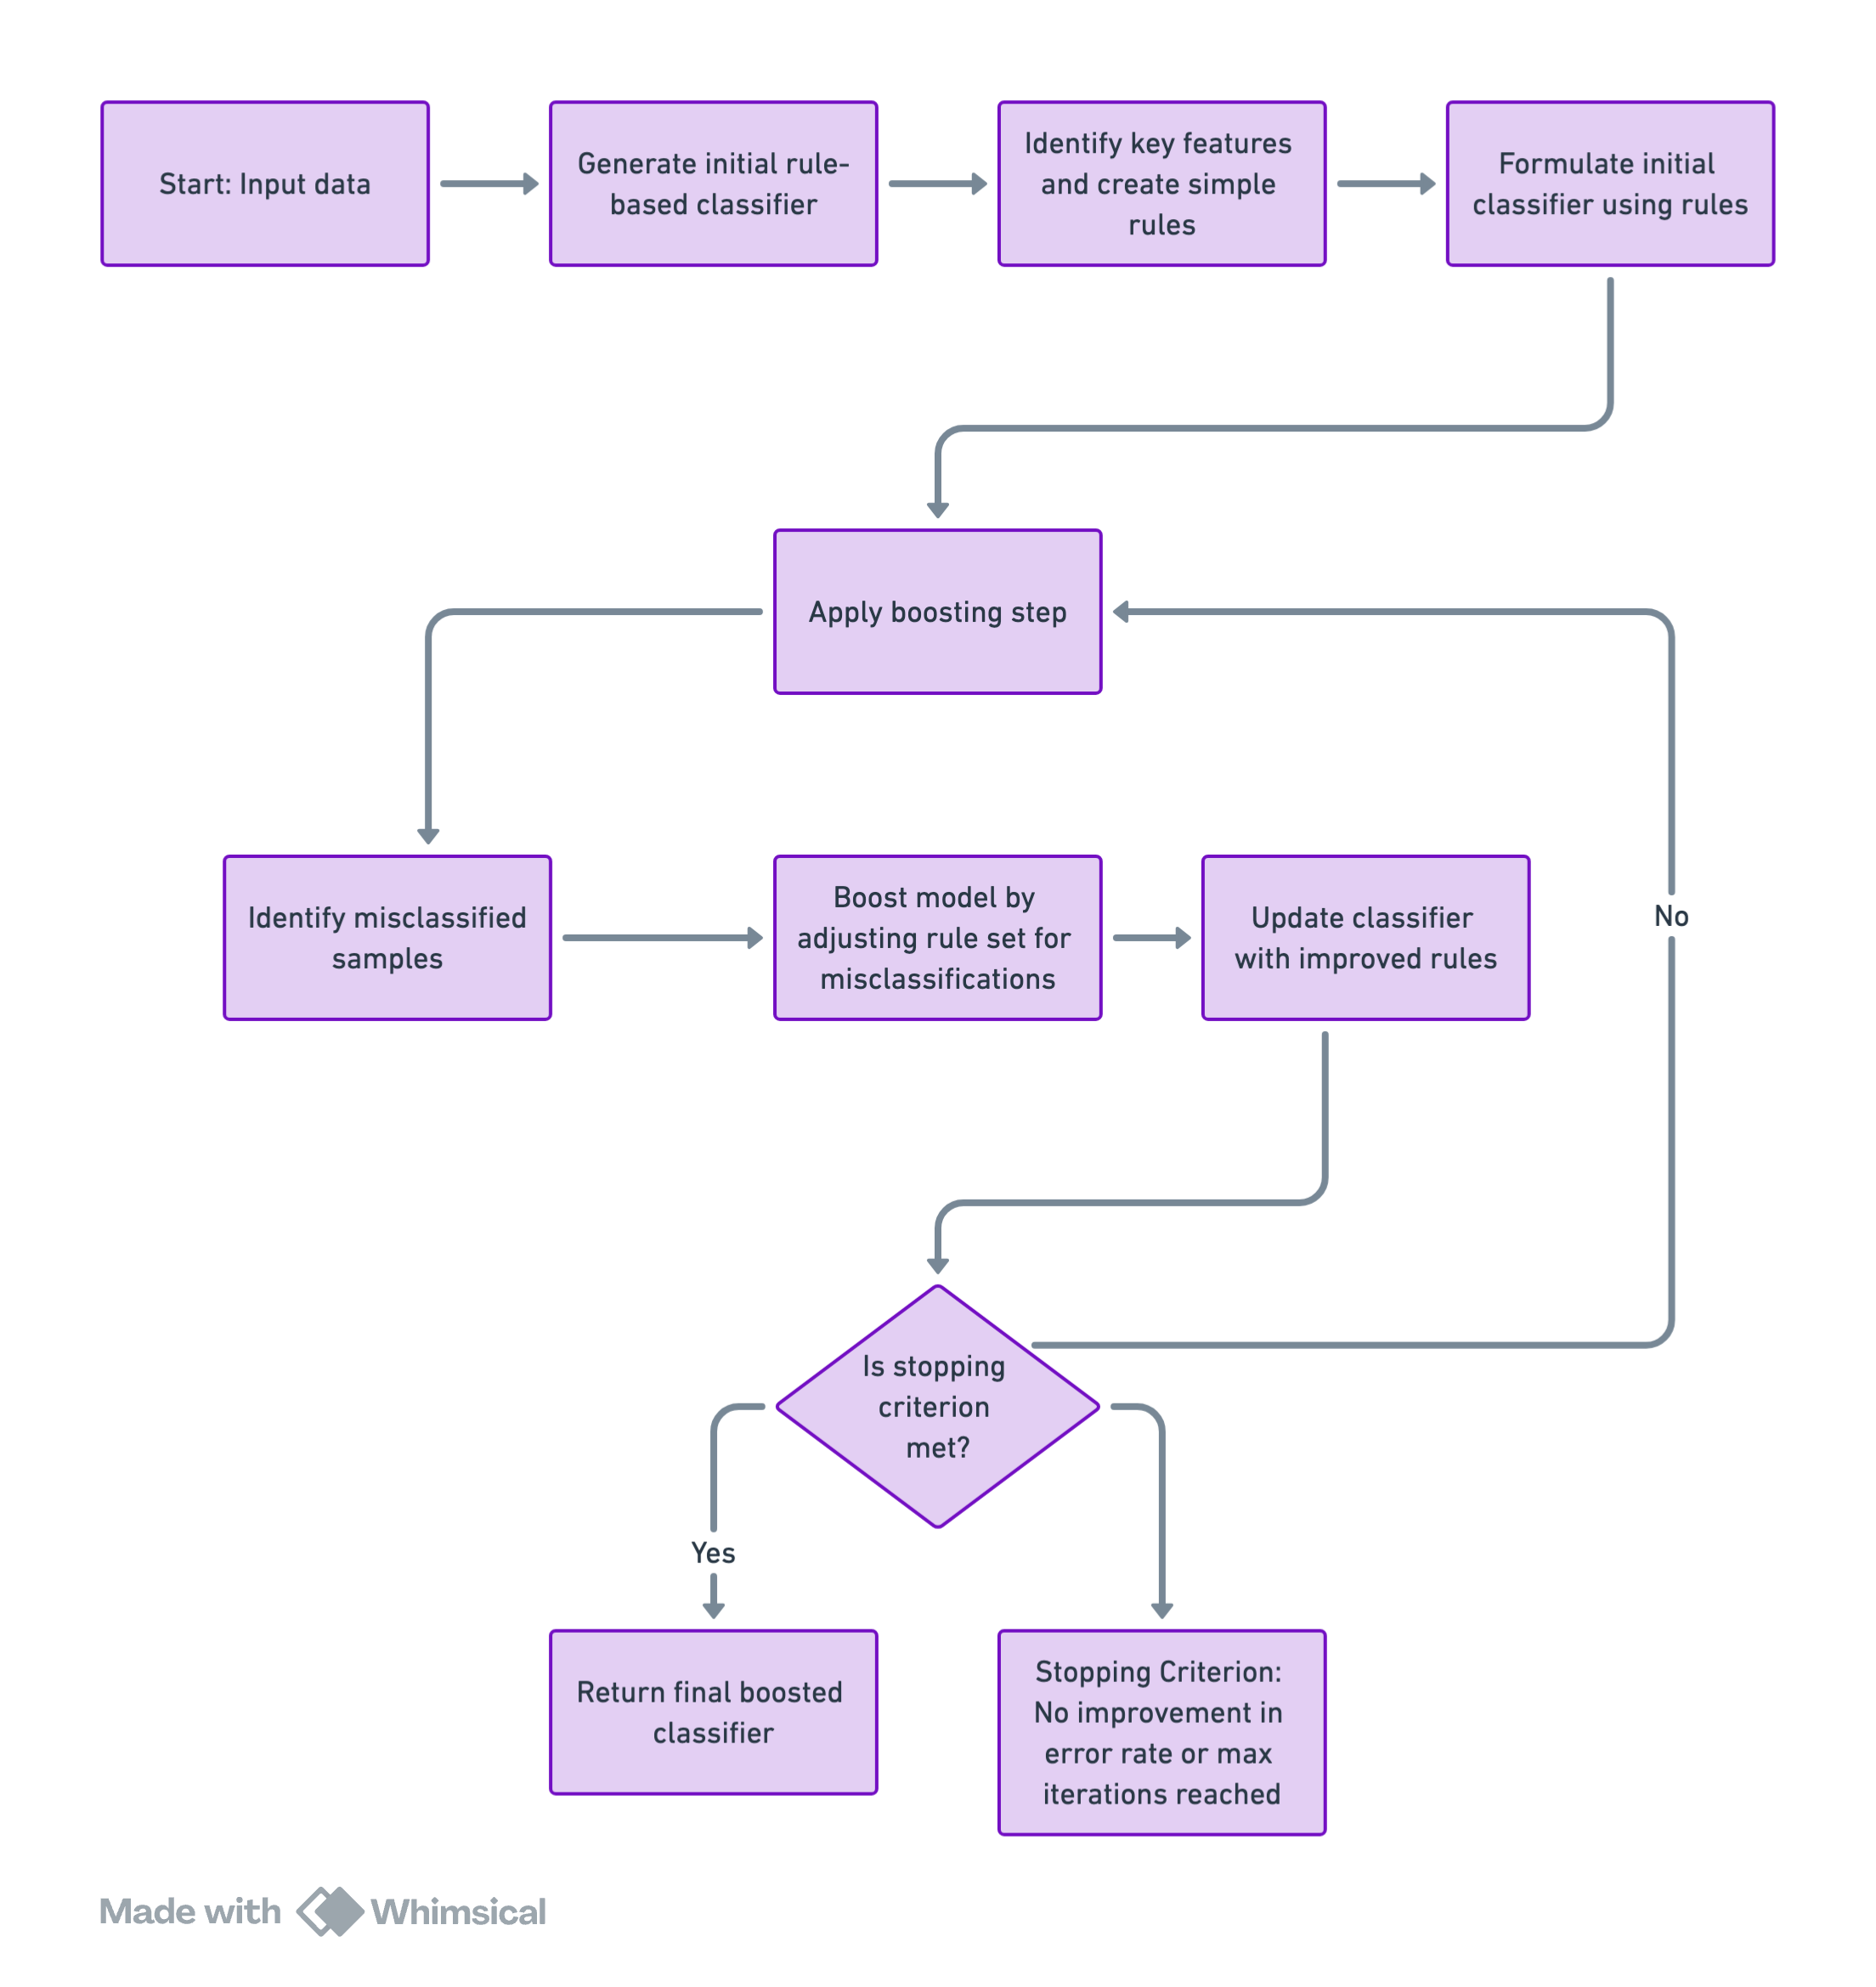

In [8]:
Image('/content/XAI/Assignment4/BoostedRuleClassifier.jpg')


## Greedy Tree Classifier
The `Greedy Tree Classifier` is a decision tree algorithm that operates on the principle of making the optimal split at each node based on the current data. This method prioritizes immediate gains in purity at each step, hence its 'greedy' nature. Such classifiers excel in environments where simple, clear decision paths are required for interpretation, making them particularly useful in fields like finance for credit scoring or in medicine for diagnostic algorithms. They construct a model by recursively partitioning the data, choosing splits that maximize information gain or minimize impurity at each step until a stopping criterion is met. This approach can lead to highly accurate but sometimes overfitted models, requiring careful tuning and potentially pruning to generalize well on unseen data.


In [ ]:
from imodels import GreedyTreeClassifier

# Initialize the Greedy Rule Tree model
model_cart = GreedyTreeClassifier()

# Fit the model
model_cart.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Predict using the trained model
y_pred_cart = model_cart.predict(X_test)

# Calculate accuracy
accuracy_cart = accuracy_score(y_test, y_pred_cart)
print(f'Accuracy of Greedy Rule Tree: {accuracy_cart:.2f}')

# Print classification report
print(classification_report(y_test, y_pred_cart))

# Display confusion matrix
cm_cart = confusion_matrix(y_test, y_pred_cart)
print("Confusion Matrix for Greedy Rule Tree:\n", cm_cart)


Accuracy of Greedy Rule Tree: 0.76
              precision    recall  f1-score   support

           0       0.78      0.50      0.61        14
           1       0.75      0.91      0.82        23

    accuracy                           0.76        37
   macro avg       0.76      0.71      0.72        37
weighted avg       0.76      0.76      0.74        37

Confusion Matrix for Greedy Rule Tree:
 [[ 7  7]
 [ 2 21]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GreedyTreeClassifier was fitted without feature names
  warnings.warn(


### Model Analysis
The Greedy Tree Classifier achieved an overall accuracy of 76% on the test dataset, with a precision of 0.76, recall of 0.71, and a macro average F1-score of 0.72, as indicated in the performance metrics. While the classifier demonstrates strong ability to identify survivors (Class 1) with a high recall of 0.91 and a precision of 0.75, it shows limitations in accurately classifying non-survivors (Class 0), evident from a lower recall of 0.50. This suggests that while the classifier is effective in recognizing the more common patterns, it struggles with less represented classes, possibly due to its greedy approach in selecting the optimal split at each node without considering future repercussions, which might lead to potential overfitting or bias towards dominant data features.


### Model Algorithm Block Diagram Visualization


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


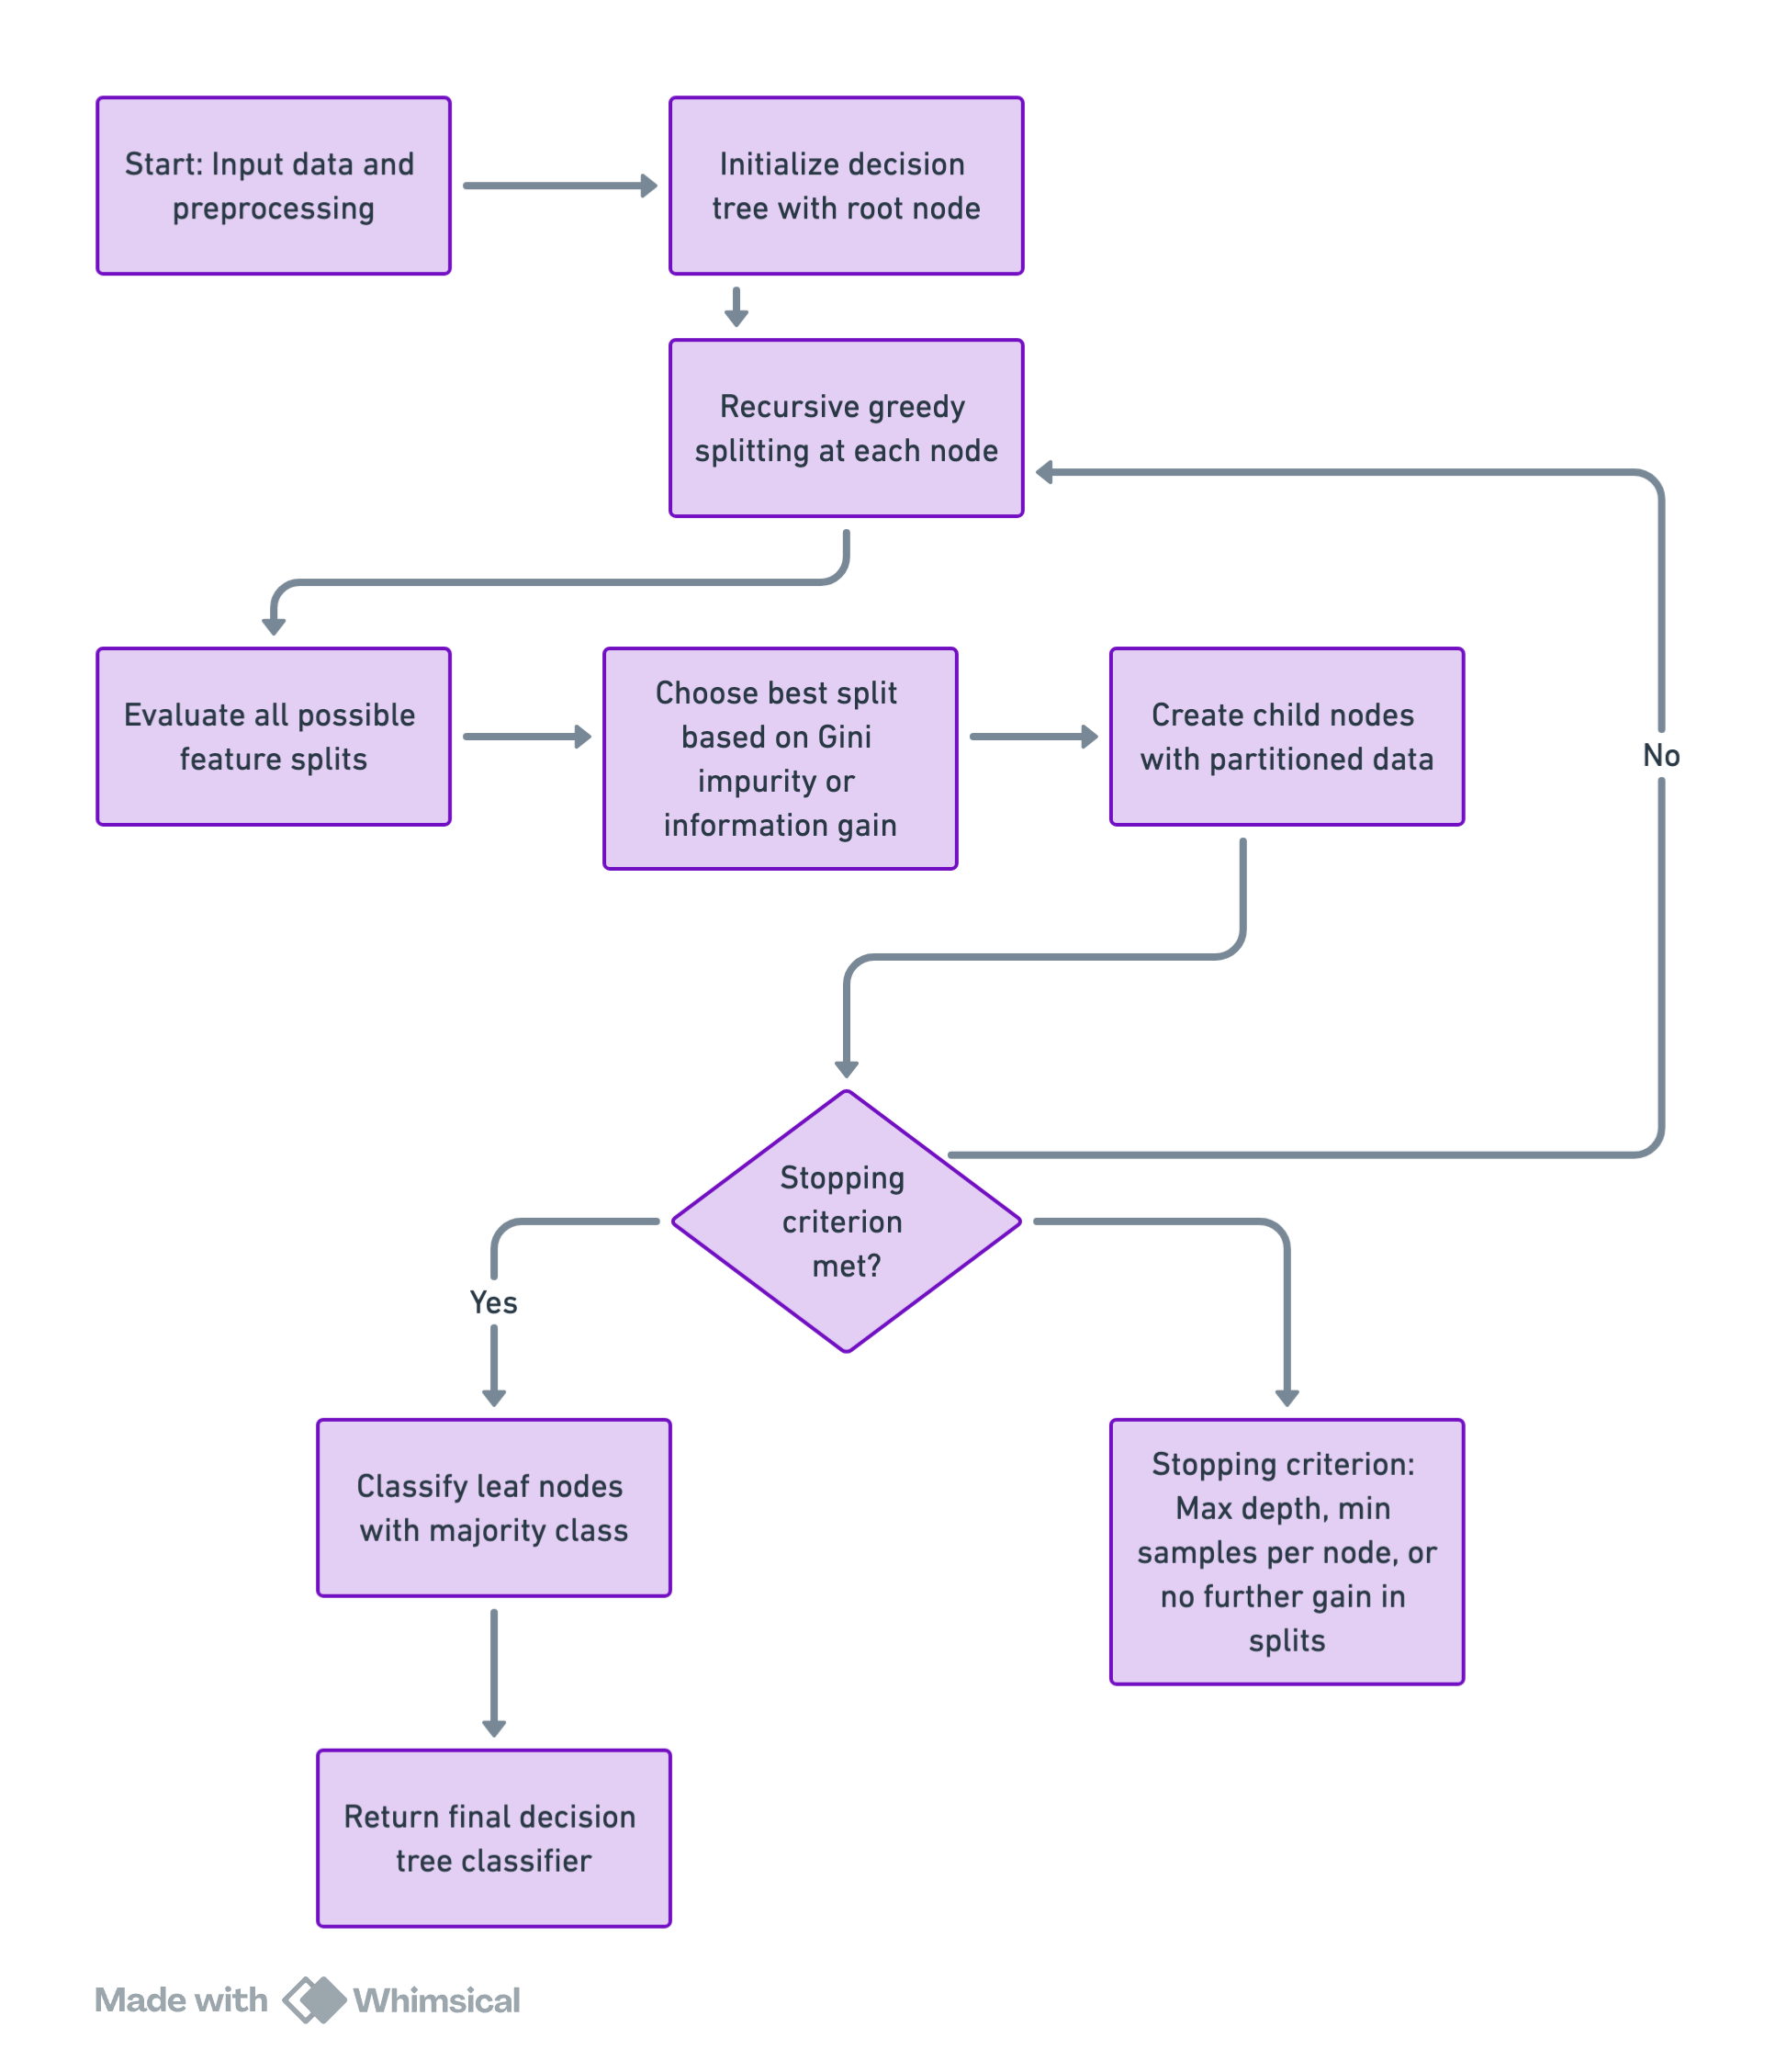

In [11]:
Image('/content/XAI/Assignment4/GreedyTreeClassfier.jpg')

## Skope Rules Classifier

The `Skope Rules Classifier` is a machine learning model designed to generate easily interpretable decision rules from a dataset. This classifier is part of a broader category of rule-based algorithms that prioritize transparency and simplicity in their decision-making processes. Skope Rules excels at identifying and extracting the most predictive rules which can then be used to make decisions. The key advantage of this approach lies in its ability to provide clear, understandable rules that describe why certain decisions or predictions are made, making it extremely valuable in domains where understanding the rationale behind a model's decision is crucial, such as in healthcare diagnostics and credit scoring.

Skope Rules works by fitting a number of decision trees to randomly sampled subsets of the dataset and then extracting the decision rules from these trees that best capture the patterns of the data. It evaluates these rules based on precision and recall, ensuring that the rules not only cover a significant portion of the data but also are highly accurate. This technique makes Skope Rules particularly adept at handling imbalanced datasets where certain classes are underrepresented. The interpretability of the Skope Rules Classifier allows users to make informed decisions based on comprehensive insights into the data, facilitating greater trust and easier validation of the model's predictions.



In [ ]:
from imodels import SkopeRulesClassifier

# Initialize the Skope Rule Set model
model_skope = SkopeRulesClassifier(n_estimators=10, precision_min=0.5, recall_min=0.1, max_samples=0.8)

# Fit the model
model_skope.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SkopeRulesClassifier(recall_min=0.1)

In [ ]:
# Predict using the trained model
y_pred_skope = model_skope.predict(X_test)

# Calculate accuracy
accuracy_skope = accuracy_score(y_test, y_pred_skope)
print(f'Accuracy of Skope Rules: {accuracy_skope:.2f}')

# Print classification report
print(classification_report(y_test, y_pred_skope))

# Display confusion matrix
cm_skope = confusion_matrix(y_test, y_pred_skope)
print("Confusion Matrix for Skope Rules:\n", cm_skope)


Accuracy of Skope Rules: 0.78
              precision    recall  f1-score   support

           0       0.65      0.93      0.76        14
           1       0.94      0.70      0.80        23

    accuracy                           0.78        37
   macro avg       0.80      0.81      0.78        37
weighted avg       0.83      0.78      0.79        37

Confusion Matrix for Skope Rules:
 [[13  1]
 [ 7 16]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Model Analysis
The Skope Rules Classifier exhibits a solid overall accuracy of 78% on the test dataset. The detailed performance metrics reveal a precision of 0.80, recall of 0.81, and a macro average F1-score of 0.78, reflecting its ability to balance between precision and recall effectively. Specifically, the classifier demonstrates high precision (0.94) and a decent recall (0.70) for the more prevalent Class 1, while achieving remarkable recall (0.93) but lower precision (0.65) for Class 0. This suggests that while Skope Rules is highly effective at identifying true positives for the less frequent Class 0, it does so at the expense of more false positives, indicated by the lower precision. The confusion matrix further illustrates this point, with the classifier correctly predicting 13 of 14 instances for Class 0, but misclassifying 7 out of 23 instances for Class 1. This performance highlights the classifier's strengths in identifying positive cases across different classes while also pointing to areas where precision could be enhanced to reduce false positives.


### Model Algorithm Block Diagram Visualization


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


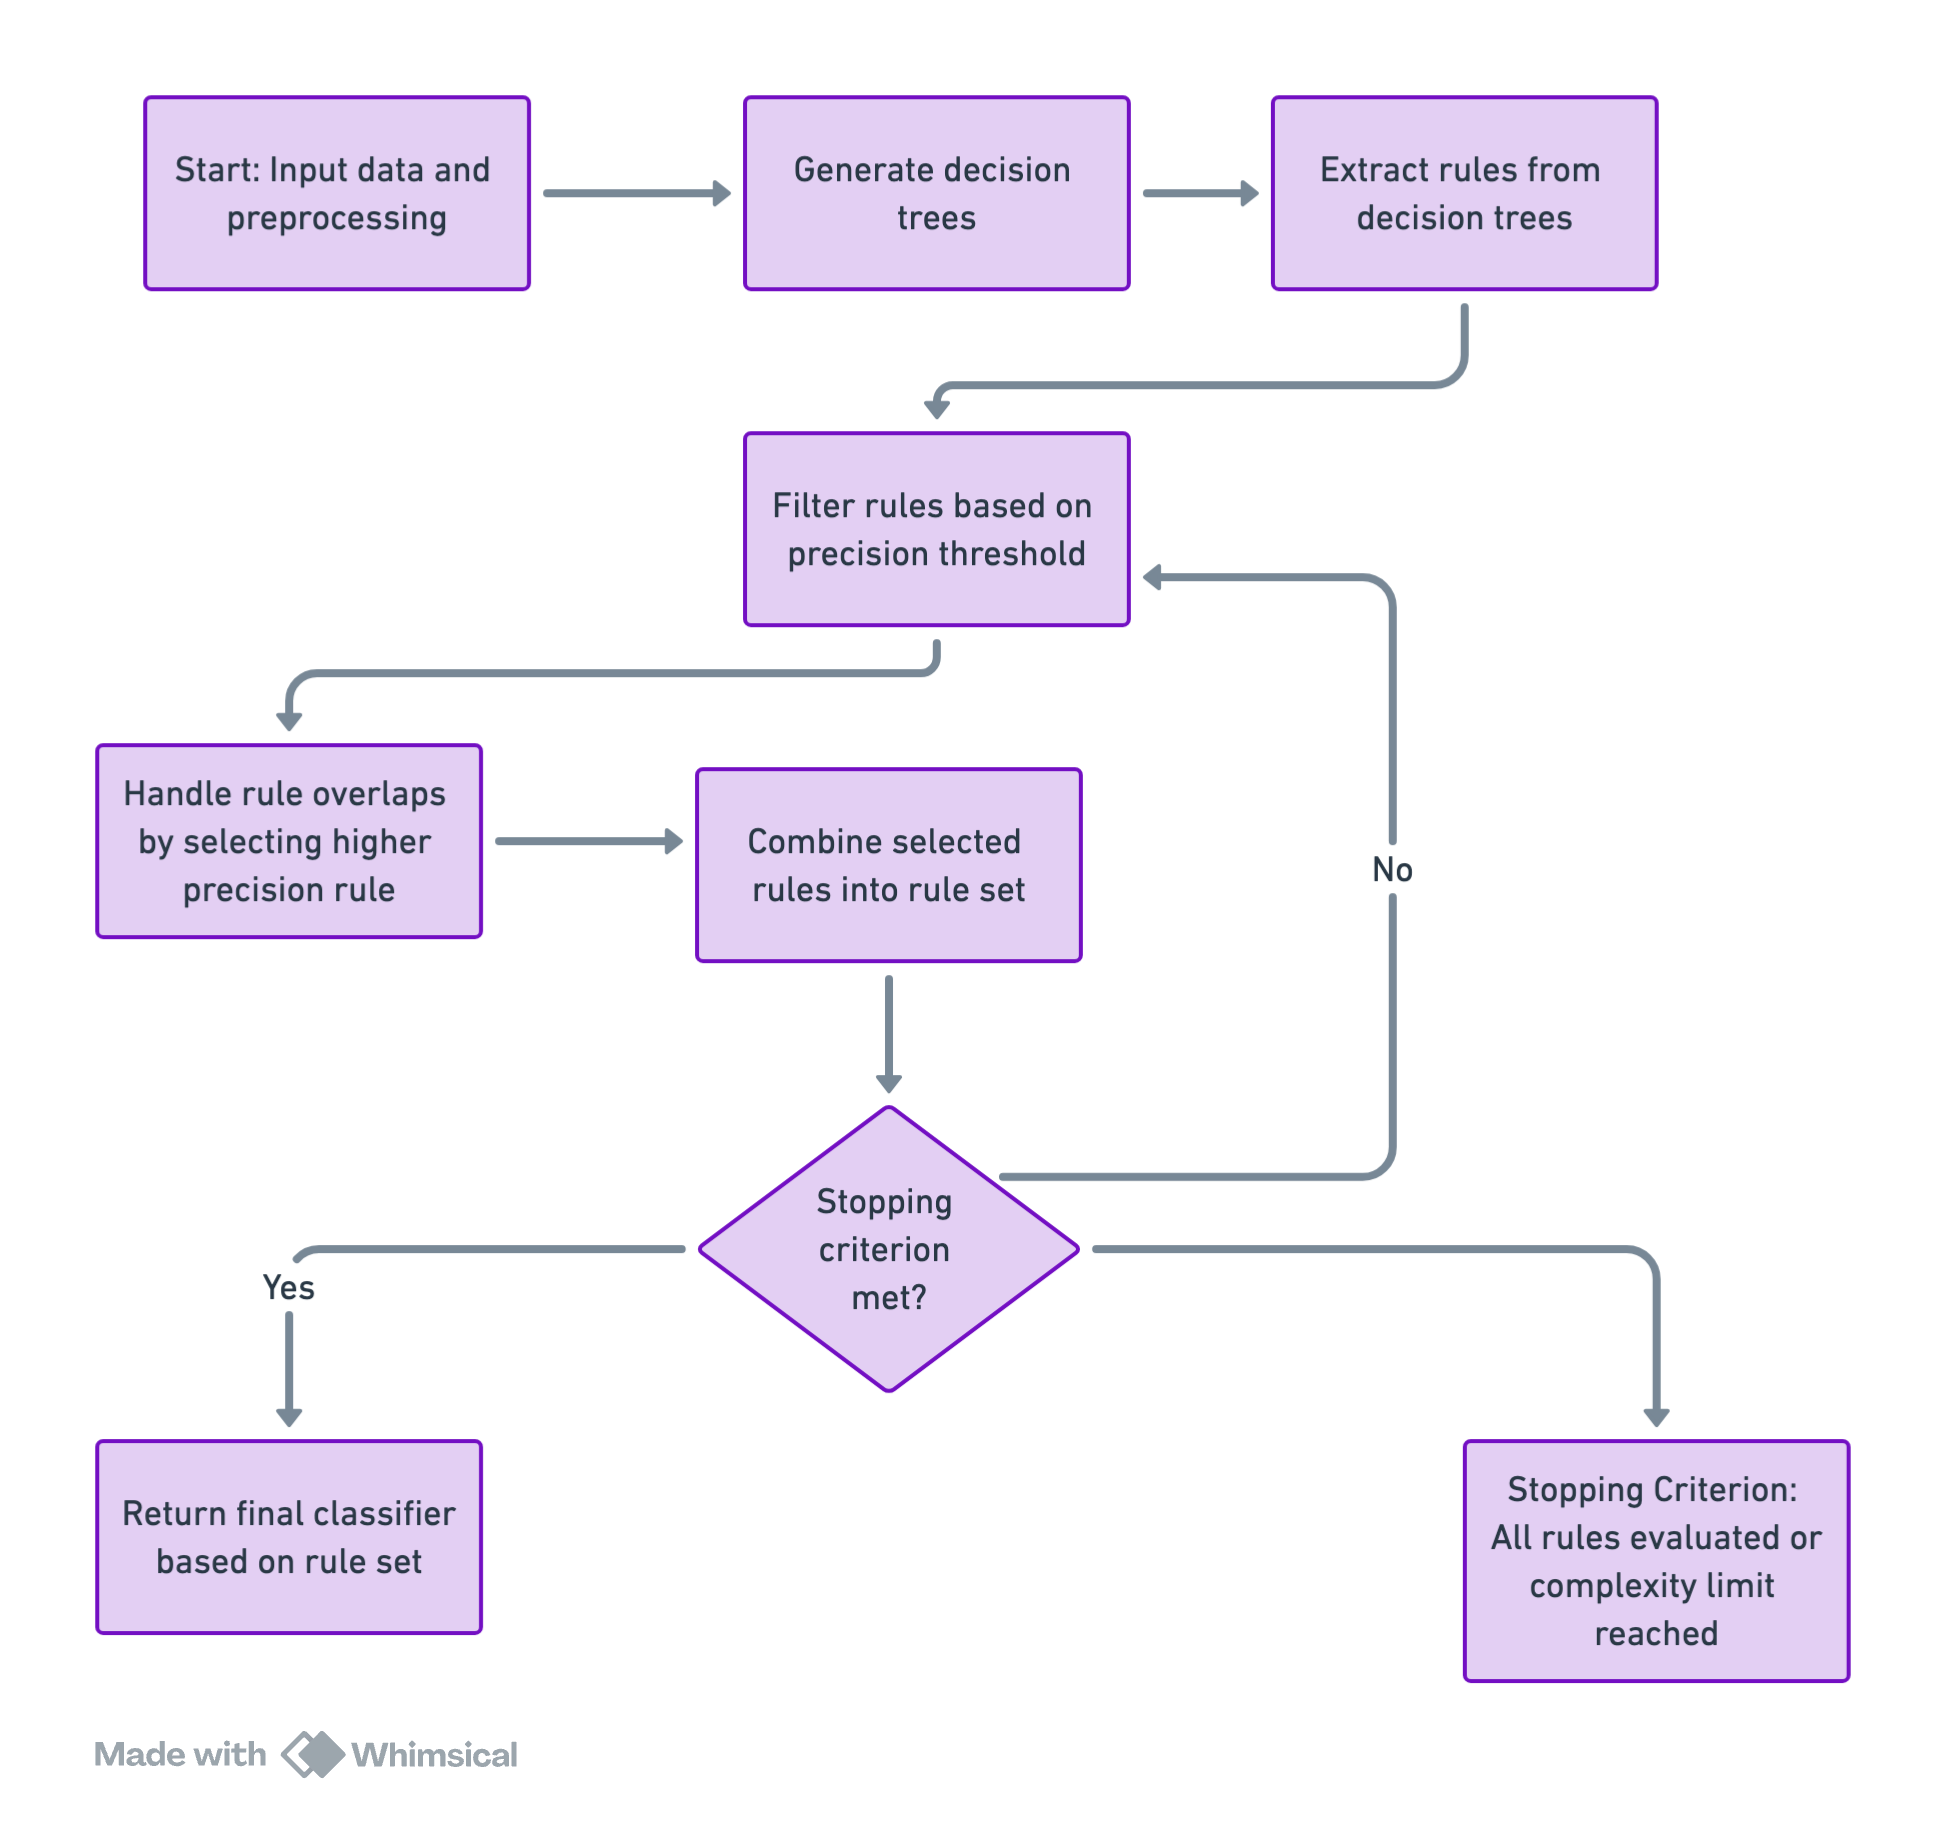

In [12]:
Image('/content/XAI/Assignment4/ScopeRuleClassifier.jpg')